In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip3 install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=163fa2858b9a05586a2cd83d55f7366066be452880095392013bc0441ff624bb
  Stored in directory: /root/.cache/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built face-recognition-models


In [7]:
#image and data packages
from time import time
import face_recognition
import cv2
from PIL import Image
from skimage import color
from skimage.color import rgb2gray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.datasets import fetch_lfw_people
import os
import dlib
from skimage import exposure
from google.colab.patches import cv2_imshow




#models
#from sklearn.

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


RuntimeError: ignored

# Function Declarations #

In [ ]:
def extract_name(path):
    if 'george' in path:
      return 'George Bush'
    elif 'ariel' in path:
      return 'Ariel Sharon'
    elif 'colin' in path:
      return 'Colin'
    elif 'donald' in path:
      return 'Donald Rumsfield'
    elif 'gerhard' in path:
      return 'Gerhard Schroder'
    elif 'hugo' in path:
      return 'Hugo Chavez'  
    elif 'tony' in path:
      return 'Tony Bliar' 
    else:
      return 'other'
def predict_my_photo(photo_path):
    # Load the image 
    my_image = face_recognition.load_image_file(photo_path)

    # Resize the image
    my_image_resized = cv2.resize(my_image, (w, h))

    # Convert the image to grayscale
    my_image_gray = cv2.cvtColor(my_image_resized, cv2.COLOR_BGR2GRAY)
    my_image_flattened = my_image_gray.flatten()

    # Preprocess the image: Standard scaling and PCA transformation
    my_image_scaled = scaler.transform([my_image_flattened])
    my_image_pca = pca.transform(my_image_scaled)

    # Use the model to make a prediction
    my_prediction = min_diff(my_image_pca, X_train_pca, y_train)

    # Create a custom title for your photo
    my_photo_title = "predicted: %s" % target_names[my_prediction[0]]

    # Load the photo as a grayscale image
    my_photo = cv2.imread(photo_path, cv2.IMREAD_GRAYSCALE)
    my_photo_resized = cv2.resize(my_photo, (w, h))

    plot_gallery([my_photo_resized], [my_photo_title], h, w)


'''def predict_a_photo(photo_path):
    # for use with predict_all_photos

    # Load the image
    my_image = face_recognition.load_image_file(photo_path)

    # Apply image sharpening
    sharpening_kernel = np.array([[-1, -2, -1],[-2,  17, -2],[-1, -2, -1]])
    my_image = cv2.filter2D(my_image, -1, sharpening_kernel)

    # Resize the image
    my_image_resized = cv2.resize(my_image, (w, h))

    # Convert the image to grayscale
    my_image_gray = cv2.cvtColor(my_image_resized, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization
    my_image_gray = cv2.equalizeHist(my_image_gray)

    my_image_flattened = my_image_gray.flatten()

    # Preprocess the image: Standard scaling and PCA transformation
    my_image_scaled = scaler.transform([my_image_flattened])
    my_image_pca = pca.transform(my_image_scaled)

    # Use the model to make a prediction
    my_prediction = min_diff(my_image_pca, X_train_pca, y_train)

    # Create custom titles for your photo
    my_photo_title_predicted = "predicted:"
    my_photo_title_target = "{}".format(target_names[my_prediction[0]])
    my_photo_title = "{}\n{}".format(my_photo_title_predicted, my_photo_title_target)

    # Load the photo as a grayscale image
    my_photo = cv2.imread(photo_path, cv2.IMREAD_GRAYSCALE)
    my_photo_resized = cv2.resize(my_photo, (w, h))

    return my_photo_resized, my_photo_title'''

def predict_a_photo_detect(photo_path):
    # for use with predict_all_photos
    label = extract_name(photo_path)

    #Load image
    my_image = face_recognition.load_image_file(photo_path)

    #get true label from file path
    

    #detect face
    face = face_recognition.face_locations(my_image)[0]
    center = (face[3]*face[1])//2, (face[0]+face[2])//2
    left = center[0] - w//2
    upper = center[1] + h//2
    right = center[0] + w//2
    lower = center[1] - h//2

    #crop image
    im = Image.open(photo_path)
    im_cropped = im.crop((face[3], face[0], face[1], face[2])) #left, upper, right, and lower
    im_np = np.asarray(im_cropped)

    # Resize the image
    my_image_resized = cv2.resize(im_np, (w, h))

    # Convert the image to grayscale
    my_image_gray = cv2.cvtColor(my_image_resized, cv2.COLOR_BGR2GRAY)

    my_image_flattened = my_image_gray.flatten()

    # Preprocess the image: Standard scaling and PCA transformation
    my_image_scaled = scaler.transform([my_image_flattened])
    my_image_pca = pca.transform(my_image_scaled)

    # Use the model to make a prediction
    my_prediction = min_diff(my_image_pca, X_pca, y)

    # Create custom titles for your photo
    my_photo_title_predicted = "predicted:"
    my_photo_title_target = "{}".format(target_names[my_prediction[0]])
    my_photo_title = "{}\n{}".format(my_photo_title_predicted, my_photo_title_target)

    # Load the photo as a grayscale image
    my_photo = cv2.imread(photo_path, cv2.IMREAD_GRAYSCALE)
    my_photo_resized = cv2.resize(my_photo, (w, h))

    return my_photo, my_photo_title, label, target_names[my_prediction[0]]





In [4]:
img_modi = face_recognition.load_image_file('/content/drive/MyDrive/Northeastern/Spring 2023/DS 5230/images/Copy of ariel1.jpg')
#detect face
face = face_recognition.face_locations(img_modi)[0]
#crop image
im = Image.open("/content/drive/MyDrive/Northeastern/Spring 2023/DS 5230/images/Copy of ariel1.jpg")
im_cropped = im.crop((face[3], face[0], face[1], face[2])) #left, upper, right, and lower
print(im_cropped.size)
im_cropped

NameError: ignored

In [3]:
im_np = np.asarray(im_cropped)

# Resize the image
my_image_resized = cv2.resize(im_np, (w, h))
PIL_image = Image.fromarray(my_image_resized).convert('RGB')
PIL_image

NameError: ignored

In [ ]:
print(left, right, upper, lower)

82663 82983 653 221


In [2]:
#ratio of h to w since h> w to find width and height to crop
inv_asp_ratio = h/w
width = im_cropped.size[0]
height = round(inv_asp_ratio*width)

#define borders
center = (face[3]+face[1])//2, (face[0]+face[2])//2

left = center[0] - round(width/2)
upper = center[1] + round(height/2)
right = center[0] + round(width/2)
lower = center[1] - round(height/2)

#crop borders
im_cropped = im.crop((left, upper, right, lower)) #left, upper, right, and lower
print(im_cropped.size)
im_cropped


NameError: ignored

In [ ]:
def predict_all_photos(folder_path):
    # Get a list of all files in the folder
    file_list = os.listdir(folder_path)

    # Filter the list to include only image files (e.g., .jpg, .png)
    image_extensions = ['.jpg', '.jpeg', '.png']
    image_files = [file for file in file_list if any(file.lower().endswith(ext) for ext in image_extensions)]


    #initialize photos and predictions
    photos = []
    titles = []
    predictions = []
    labels = []
    # Process each image file using the predict_my_photo function
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        print(f"Processing {image_file}:")
        photo, title, label, pred = predict_a_photo_detect(image_path)
        photos.append(photo)
        titles.append(title)
        predictions.append(pred)
        labels.append(label)
    print('accuracy: ', accuracy_score(labels, predictions))
    plot_gallery(photos, titles, h, w)
    plt.tight_layout()


In [ ]:
def min_diff(input, data, y):
  #predicted values
  predicted = []

  #for each input
  for inp in input:
    min_dist = 1000000000

    #check distance from input to each row in known faces
    for i, row in enumerate(data):
    
      dist = math.dist(inp, row)

      if dist < min_dist:
        min_dist = dist
        min_idx = i
    
    predicted.append(y[min_idx])
  return predicted


def plot_gallery(images, titles, h, w, n_row=7, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)



# Getting Data and Preprocessing #

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)



In [ ]:
n_samples, h, w = lfw_people.images.shape
#n_features = X.shape[1]  

X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = len(target_names)


print("Total dataset size:")
print("n_samples: %d" % n_samples)
#print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print("height: %d" % h)
print("width: %d" % w)



In [ ]:
lfw_people.images.shape

In [ ]:
target_names

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



# Eigenfaces #

In [ ]:
n_components = 150
scaler = StandardScaler()
scaler_tts = StandardScaler()
X_train_std = scaler_tts.fit_transform(X_train)
X_std = scaler.fit_transform(X)
X_test_std = scaler_tts.transform(X_test)
print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X.shape[0])
)
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_std)
pca_tts = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train_std)

print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_pca = pca.transform(X_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print("done in %0.3fs" % (time() - t0))

In [ ]:
eigenfaces[0].shape

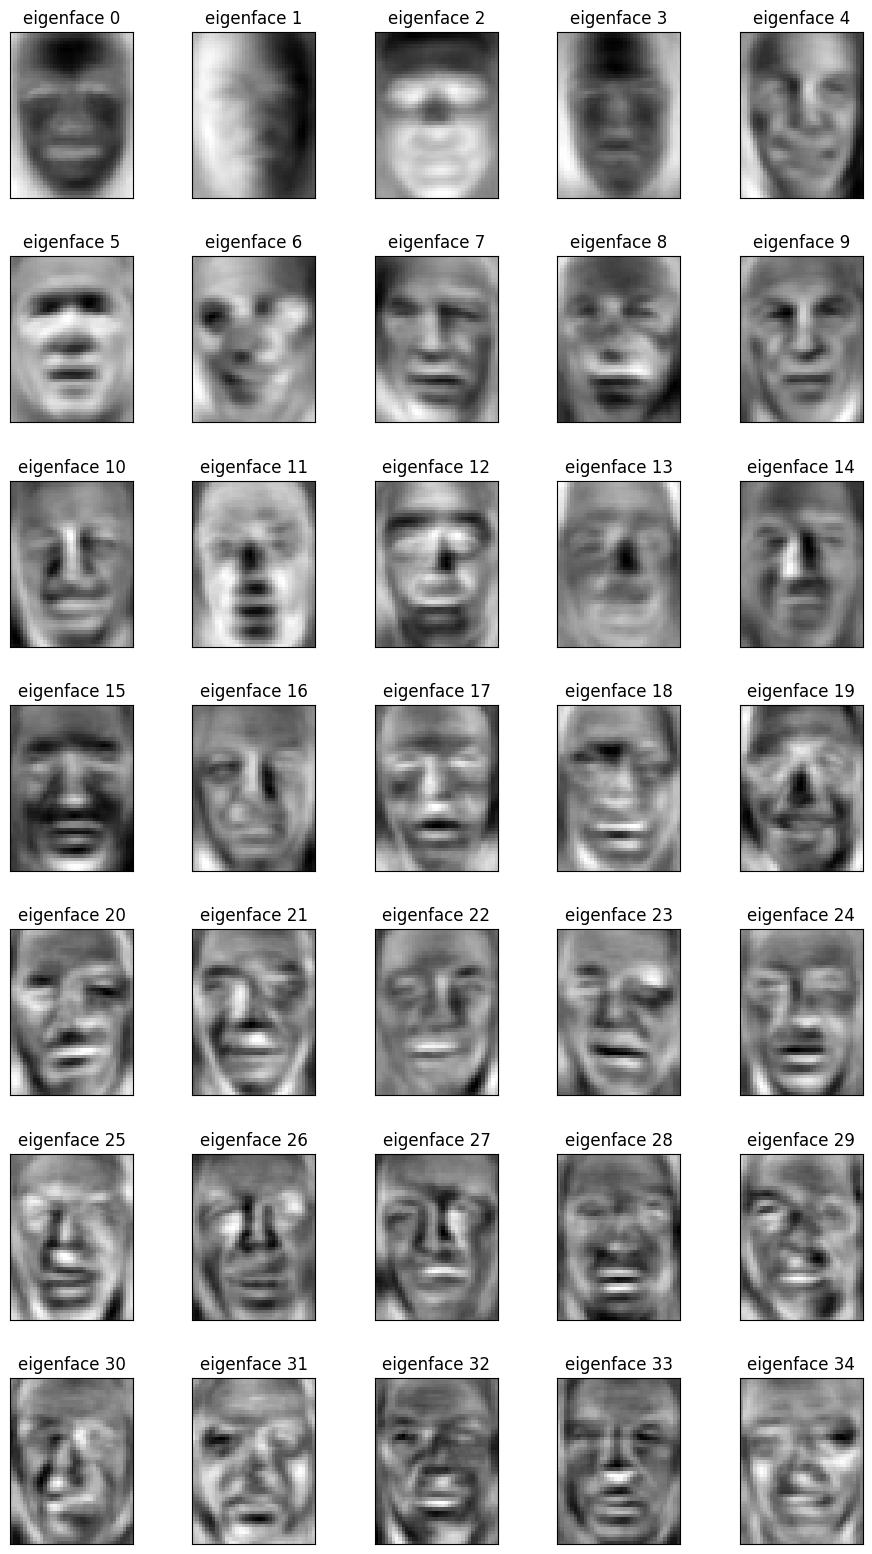

In [ ]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

# 1NN Algo #

In [ ]:
#basic comparison model

t0 = time()
y_pred = min_diff(X_test_pca, X_train_pca, y_train)
print("eigenfaces predictions made in: %0.3fs" % (time() - t0))

print('eigenfaces accuracy score: ', round(accuracy_score(y_test, y_pred), 3))


t0 = time()
y_pred = min_diff(X_test, X_train, y_train)
print("regular predictions made in: %0.3fs" % (time() - t0))

print('regular accuracy score: ', round(accuracy_score(y_test, y_pred), 3))

eigenfaces predictions made in: 5.349s
eigenfaces accuracy score:  0.702
regular predictions made in: 69.280s
regular accuracy score:  0.565


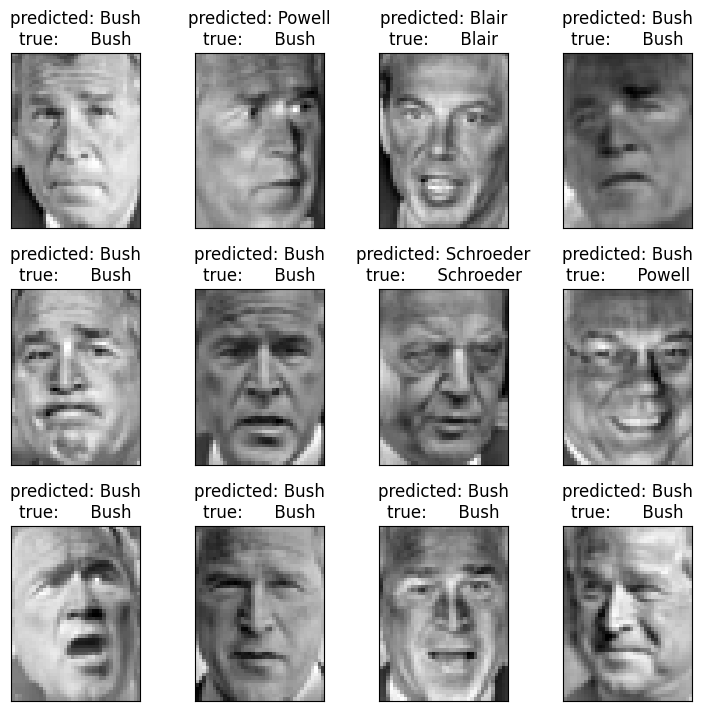

In [ ]:
y_pred = np.array(y_pred)

prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_pca, y_train)
y_pred = neigh.predict(X_test_pca)
print('eigenfaces accuracy score: ', round(accuracy_score(y_test, y_pred), 3))

eigenfaces accuracy score:  0.711


# Random Forest #

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats = 2, random_state = 90)
distributions = dict(max_depth=list(range(1,25)), n_estimators= list(range(1,100)))

rfc = RandomForestClassifier(random_state=7)

search = RandomizedSearchCV(rfc, distributions, n_iter = 150, scoring = 'accuracy', n_jobs = -1,  cv = cv, random_state = 12)
result = search.fit(X_pca, y)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best Score: 0.6216408268733851
Best Hyperparameters: {'n_estimators': 75, 'max_depth': 19}


# Logistic Regression #

In [ ]:
from sklearn.linear_model import LogisticRegression

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats = 2, random_state = 70)
param_grid = dict(multi_class=['ovr', 'multinomial'])

model = LogisticRegression(max_iter = 10000)
search = GridSearchCV(model, param_grid, scoring = 'accuracy', cv = cv)
result = search.fit(X_pca, y)
print(round(result.best_score_, 3))
print('Best Hyperparameters: %s' % result.best_params_)

0.823
Best Hyperparameters: {'multi_class': 'ovr'}


# SVM #

In [ ]:
from sklearn.svm import SVC

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats = 2, random_state = 70)
param_grid = dict(gamma=['scale', 'auto'], degree= [1, 2, 3], C=list(np.arange(0.05, 1, .05)), kernel = ['linear', 'poly', 'rbf', 'sigmoid'])

clf = SVC()
search = GridSearchCV(clf, param_grid, scoring = 'accuracy', cv = cv)
result = search.fit(X_pca, y)
print(round(result.best_score_, 3))
print('Best Hyperparameters: %s' % result.best_params_)

# Testing on outside preprocessed images #

In [ ]:
# Call the predict_my_photo function with the path to your photo in Google Drive
#my_photo_path = '/content/drive/MyDrive/images'
my_photos_folder_path = '/content/drive/MyDrive/Northeastern/Spring 2023/DS 5230/images'
predict_all_photos(my_photos_folder_path)


